# 이미지 데이터 셋을 이용한 CNN Modeling
## Animals Dataset Categorical Classification
* Train_Data : 5000
* Valid_Data : 3000
* Test_Data : 3000

In [1]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. wget From Github

> ## 1) 'animals_part.zip' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z{ip,01,02}

--2023-04-04 06:33:34--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88551715 (84M) [application/zip]
Saving to: ‘animals_part.zip’

animals_part.zip    100%[===================>]  84.45M   306MB/s    in 0.3s    

2023-04-04 06:33:37 (306 MB/s) - ‘animals_part.zip’ saved [88551715/88551715]

--2023-04-04 06:33:37--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z01’

animals_part.z01    100%[===================>]  90.00M   310MB/s    in 0.3s    

2023-04-04 06:33:41 (310 

* 다운로드 결과 확인

In [4]:
!ls -l

total 270804
-rw-r--r-- 1 root root 94371840 Apr  4 06:33 animals_part.z01
-rw-r--r-- 1 root root 94371840 Apr  4 06:33 animals_part.z02
-rw-r--r-- 1 root root 88551715 Apr  4 06:33 animals_part.zip
drwxr-xr-x 1 root root     4096 Mar 31 13:36 sample_data


> ## 2) 분할된 파일 합치기

In [5]:
!zip -Fq animals_part.zip --out animals.zip

* 'animals.zip' 생성 확인

In [6]:
!ls -l

total 541604
-rw-r--r-- 1 root root  94371840 Apr  4 06:33 animals_part.z01
-rw-r--r-- 1 root root  94371840 Apr  4 06:33 animals_part.z02
-rw-r--r-- 1 root root  88551715 Apr  4 06:33 animals_part.zip
-rw-r--r-- 1 root root 277295391 Apr  4 06:34 animals.zip
drwxr-xr-x 1 root root      4096 Mar 31 13:36 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'animals.zip'

In [7]:
!unzip -q /content/animals.zip

* 학습 데이터 확인

In [8]:
!ls -l animals/

total 12
drwxr-xr-x 12 root root 4096 Oct 25 13:50 test
drwxr-xr-x 12 root root 4096 Oct 25 13:50 train
drwxr-xr-x 12 root root 4096 Oct 25 13:50 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [9]:
train_dir = 'animals/train'
valid_dir = 'animals/validation'
test_dir  = 'animals/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 50,
    class_mode = 'categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    batch_size = 50,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 5000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


> ## 4) Test train_generator

In [16]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 :', data_batch.shape) #50씩 생성되고  shape = (150,150,3)
  print('배치 레이블 크기 :', labels_batch.shape)
  break

배치 데이터 크기 : (50, 150, 150, 3)
배치 레이블 크기 : (50, 10)


# III. CNN Keras Modeling

> ## 1) Model Define

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential(
    layers.Conv2D(filters= 32, kernel_size= (3,3), activation = 'relu', input_shape =(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00005)))
model.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00005)))
model.add(layers.Dense(10, activation = 'softmax'))

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 128)     

> ## 2) Model Compile

In [52]:
model.compile(optimizer= 'adam',
              loss ='categorical_crossentropy',
              metrics =['accuracy'])

> ## 3) Model Fit

In [53]:
history = model.fit(train_generator, 
                   steps_per_epoch = 100,
                   epochs= 100,
                   validation_data= valid_generator,
                   validation_steps= 60)

Epoch 1/100
100/100 [==============================] - 29s 216ms/step - loss: 2.1975 - accuracy: 0.2060 - val_loss: 2.0768 - val_accuracy: 0.2047
Epoch 2/100
100/100 [==============================] - 22s 218ms/step - loss: 1.8835 - accuracy: 0.3272 - val_loss: 1.9393 - val_accuracy: 0.3023
Epoch 3/100
100/100 [==============================] - 22s 216ms/step - loss: 1.6621 - accuracy: 0.4068 - val_loss: 1.7540 - val_accuracy: 0.3800
Epoch 4/100
100/100 [==============================] - 26s 256ms/step - loss: 1.4323 - accuracy: 0.4966 - val_loss: 1.6492 - val_accuracy: 0.4327
Epoch 5/100
100/100 [==============================] - 21s 215ms/step - loss: 1.2461 - accuracy: 0.5740 - val_loss: 1.5360 - val_accuracy: 0.4707
Epoch 6/100
100/100 [==============================] - 21s 206ms/step - loss: 1.0553 - accuracy: 0.6438 - val_loss: 1.6561 - val_accuracy: 0.4693
Epoch 7/100
100/100 [==============================] - 22s 219ms/step - loss: 0.8234 - accuracy: 0.7368 - val_loss: 1.6238 -

> ## 4) 학습 결과 시각화

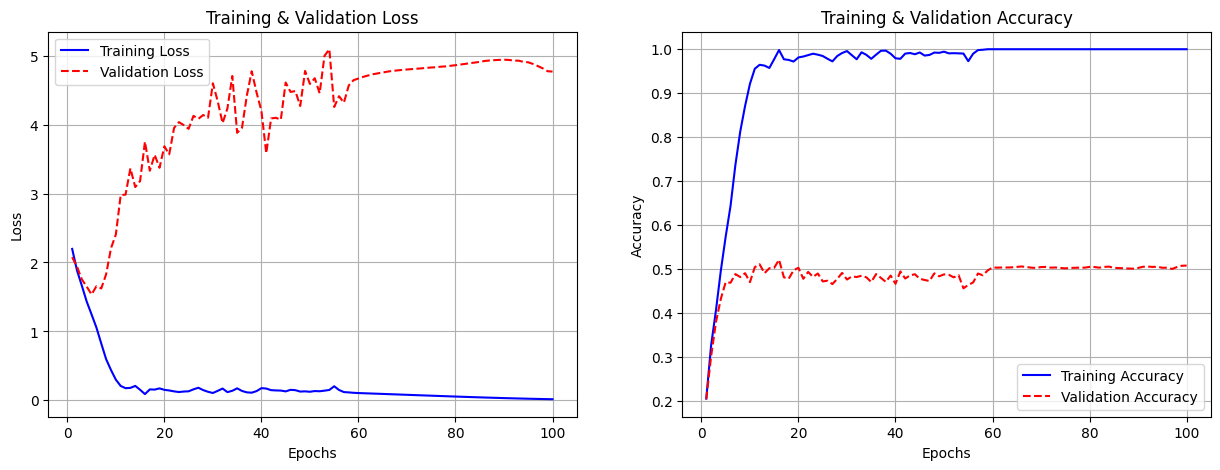

In [54]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'b-')
plt.plot(epochs, history.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'b-')
plt.plot(epochs, history.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

In [55]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50, 
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 5.07247
Accuracy = 0.49840


# 
# 
# 
# The End
# 
# 
# 